Eithar Elfatih Burie Abdelrahman DS2403

# World Happiness Report Project

Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012,
the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries
by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March
20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness
indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis,
national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to
assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of 
happiness explains personal and national variations in happiness.


In [370]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings 
warnings.filterwarnings('ignore')

In [66]:
#create dataframe of data
df1= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df1.index=df1.index+1
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
157,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [67]:
df1.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
7,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
8,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
9,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
10,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [257]:
df1.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
149,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
150,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
151,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
152,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
153,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
157,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
158,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


__Variables in the data set__


    country - 
    Region - 
    Happiness Rank- 
    Happiness Score - 
    Standard Error - 
    Economy (GDP per Capita) - 
    Family - 
    Health (life expectancy) - 
    Freedom - 
    Trust (Government Corruption)
    Generosity 
    Dystopia Residual - 


from the ab0ve data set, 

In [233]:
df1.shape

(158, 12)

In [236]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [70]:
print('The dimension of the dataframe is',df1.shape)
print(f'\n The column headers are : ', df1.columns)

The dimension of the dataframe is (158, 12)

 The column headers are :  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


There are 158 rows, and 12 columns.  12 variables (one of which is the target variable)

In [71]:
# checking dtypes 
df1.dtypes


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

there are three different data types present in this data set ( object, int 64 and float 64)

In [258]:
#drop unnecessary columns
column_to_drop=['Country', 'Happiness Rank']
for col in column_to_drop:
     if col not in df1.columns:
        print(f'Column {col} not found in dataframe.')

df1_copy=df1.drop(columns=column_to_drop)
df1_copy

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
154,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
157,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [259]:
df1_copy.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


__COMMENT:__ 

        .We can see there are different scales of measure in the features (eg. max of 'Freedom' is 0.6 where as max of 'Happiness Score' is 7.5
        .

In [290]:
#check for null values 
df1_copy.isnull().sum()



Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values present 

In [291]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 1 to 158
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.5+ KB


In [345]:
df1_copy.groupby(['Region']),[['Happiness Score']].mean()
df1_copy.sort_values(by='Happiness Score')

AttributeError: 'list' object has no attribute 'mean'

<Axes: >

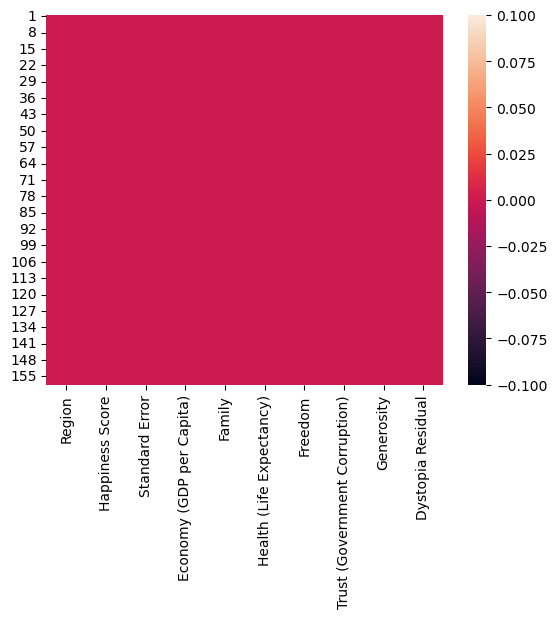

In [262]:
#visulalise information with heatmap 
sns.heatmap(df1_copy.isnull())

all vairables are the same colour, (equal to 0.00) which proves no null values 

# Univariate Anaylsis

In [314]:
#create list 
column_plot=['Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

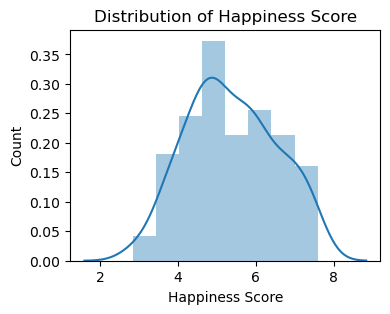

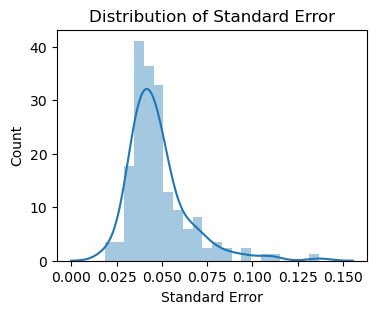

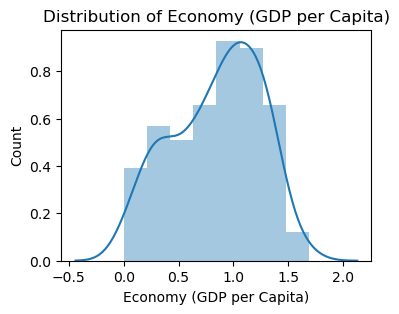

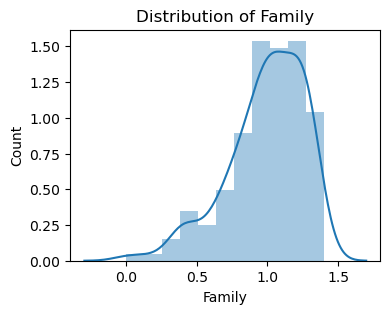

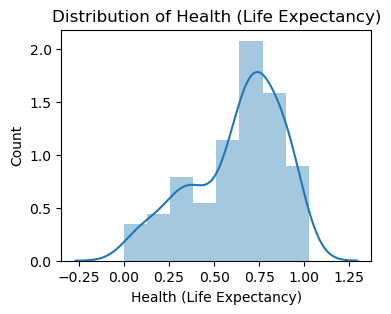

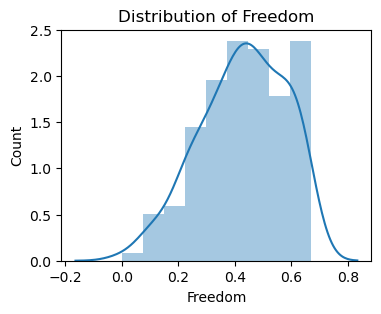

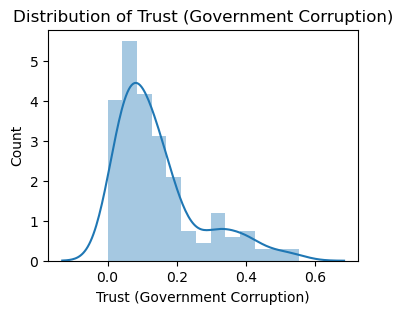

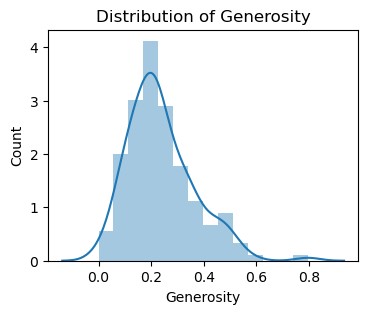

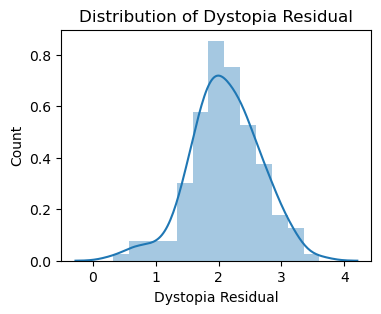

In [315]:
for column in column_plot:
    plt.figure(figsize=(4,3))
    sns.distplot(df1_copy[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')


    plt.show()
    

__COMMENTS:__


from the distribution plots we can see:

    . 'Happiness Score' is normally distributed (average around 5)
    . 'Standard Error' is also normal, but has slight left skewness
    . 'Economy' seems to have outliers (to the left side)
    . 'Family' has a fairly normal distribution with skewness to the left
    . 'Health' also has skewness to the left but with possibly more outliers 
    . 'Freedom' seems normal with skewness to the left
    . 'Trust' has right skewness (most different)
    . 'Generosity normal, with slight right skewness
    . 'Dystopia residual - almost normal, with slight left skewness

# Bivariate Analysis ('Happiness Score)

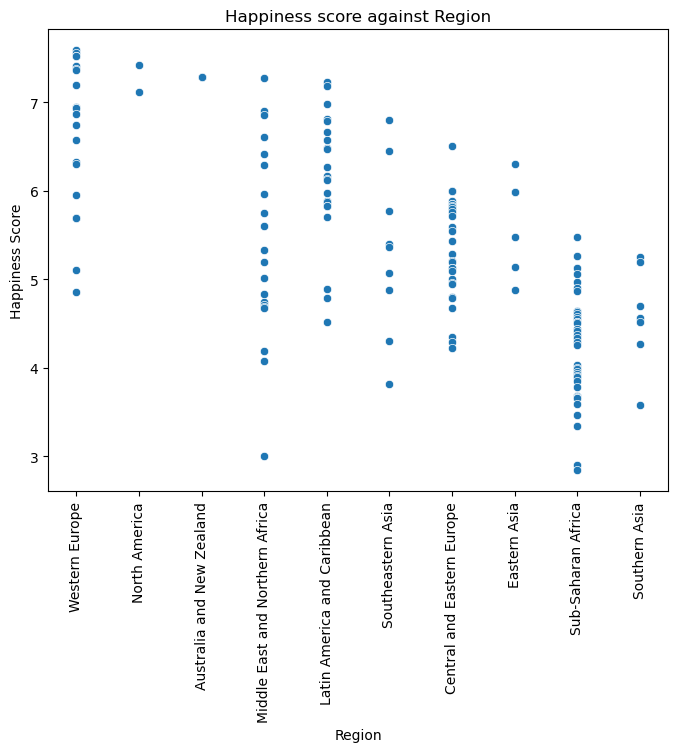

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


In [316]:
#happiness score against Region
plt.figure(figsize=(8,6))
sns.scatterplot(x='Region', y='Happiness Score',data=df1_copy)
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Happiness score against Region')
plt.xticks(rotation=90)
plt.show()

region_=df1_copy['Region'].value_counts()
print(region_)

__COMMENT:__
    
    . Majority of countries are in Sub-Saharan Africa 
    .There are many differences in amount of coutries per region 
    .value counts are countable 

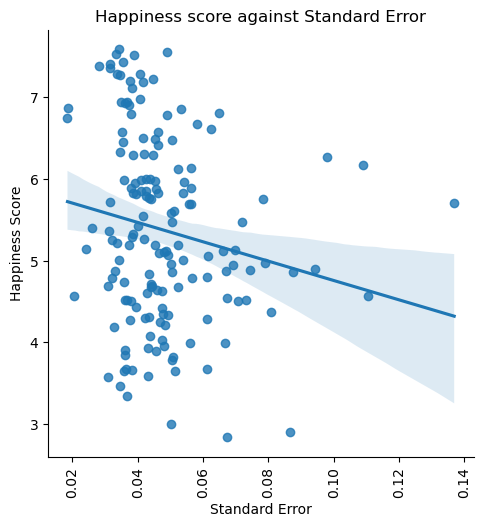

In [270]:
#
sns.lmplot(x='Standard Error', y='Happiness Score',data=df1_copy)
plt.xlabel('Standard Error')
plt.ylabel('Happiness Score')
plt.title('Happiness score against Standard Error')
plt.xticks(rotation=90)

plt.show()

__COMMENT__
    .negative correlation 
    . many outliers 


multi-vairiate anaylsis


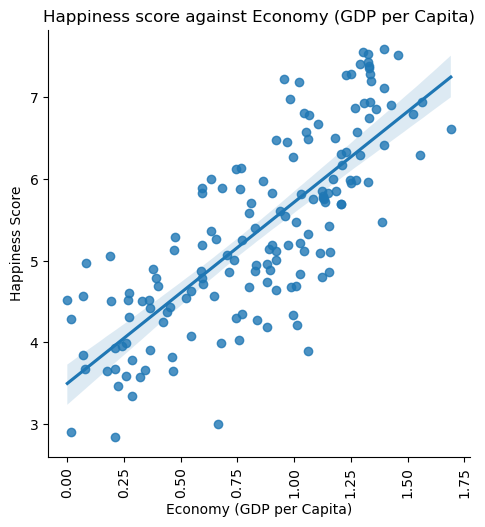

In [271]:
#

sns.lmplot(x='Economy (GDP per Capita)', y='Happiness Score',data=df1_copy)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Happiness score against Economy (GDP per Capita)')
plt.xticks(rotation=90)
plt.show()




__COMMENT:__
    In this table, we can see the percentage of GDP per region. 
    
    . Although Subsharan Africa has the most countries, it has the 5th highest GDP contribution
    .

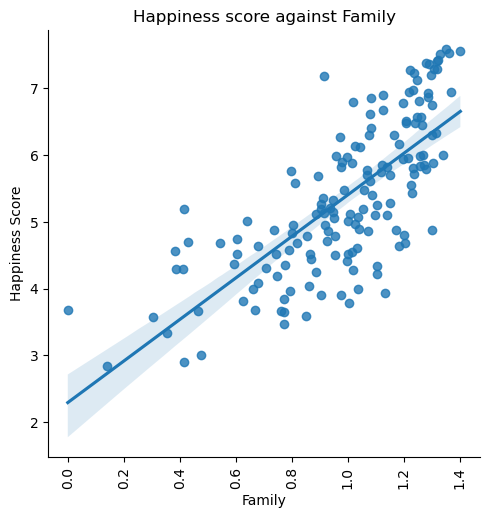

In [273]:
#
sns.lmplot(x='Family', y='Happiness Score',data=df1_copy)
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.title('Happiness score against Family')
plt.xticks(rotation=90)

plt.show()



__COMMENT:__ 
    
    . Has strong posiive correlation 

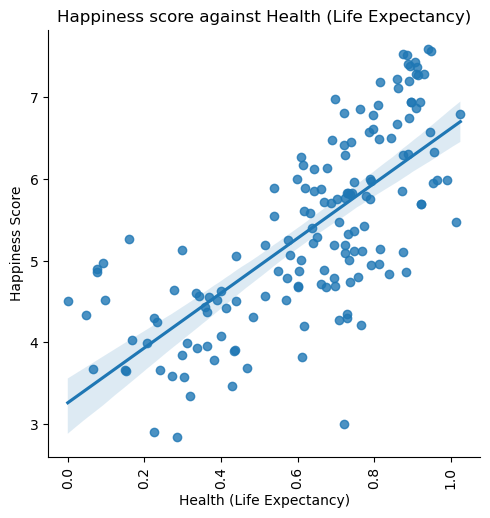

In [274]:
#
sns.lmplot(x='Health (Life Expectancy)', y='Happiness Score',data=df1_copy)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.title( 'Happiness score against Health (Life Expectancy)')
plt.xticks(rotation=90)

plt.show()




__COMMENT:__ 
    
    . Has strong posiive correlation
    . there are quite a few outliers

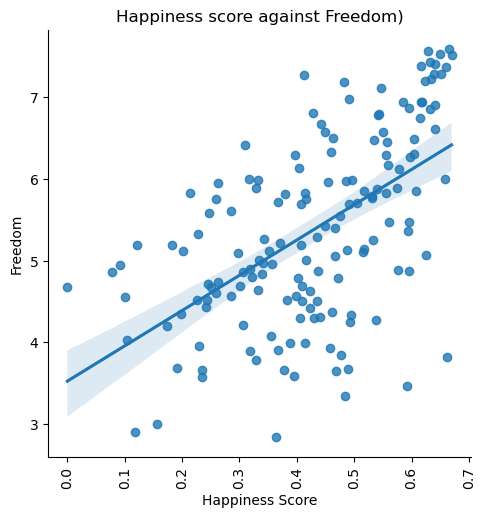

In [275]:
sns.lmplot(x='Freedom', y='Happiness Score', data=df1_copy)
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
plt.title('Happiness score against Freedom)')
plt.xticks(rotation=90)

plt.show()


__COMMENT:__ 
    
    . Has strong posiive correlation
    .quiet a few outliers
    

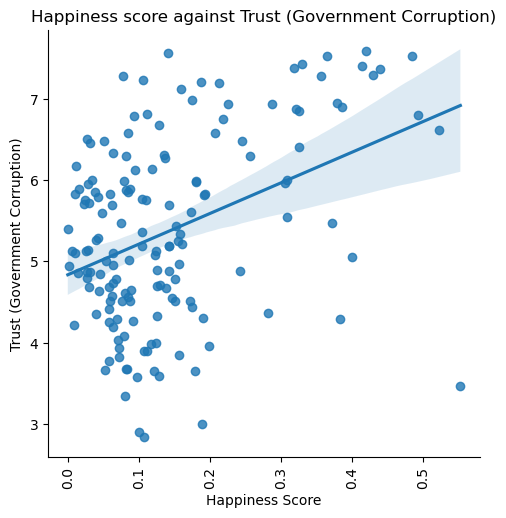

In [276]:
sns.lmplot(x='Trust (Government Corruption)', y='Happiness Score', data=df1_copy)
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
plt.title('Happiness score against Trust (Government Corruption)')
plt.xticks(rotation=90)

plt.show()

__COMMENT:__ 
    . has positive correlation 
    . as many outliers 

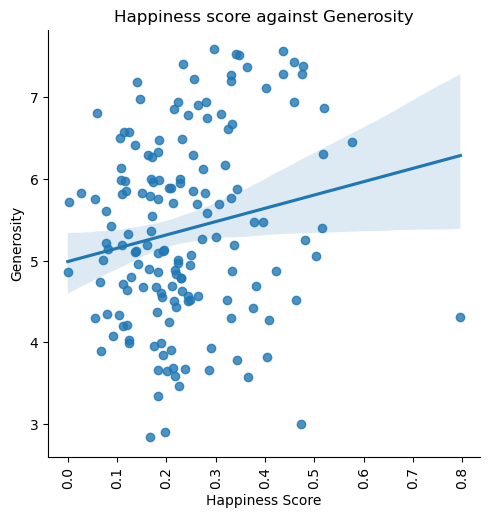

In [277]:
sns.lmplot(x='Generosity', y='Happiness Score', data=df1_copy)
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.title('Happiness score against Generosity'
         )
plt.xticks(rotation=90)

plt.show()

__COMMENTS:__ 
    . 

'Dystopia Residual

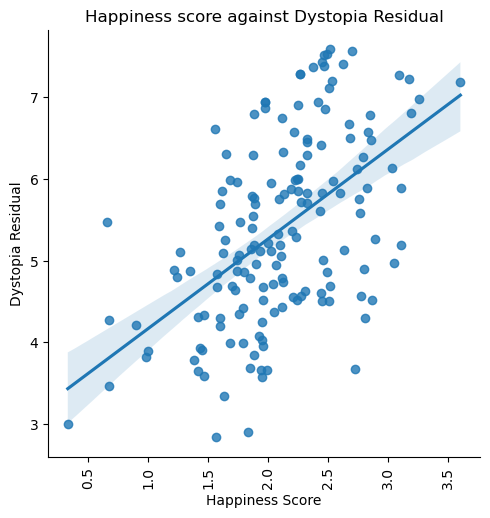

In [279]:
sns.lmplot(x='Dystopia Residual', y='Happiness Score', data=df1_copy)
plt.xlabel('Happiness Score')
plt.ylabel('Dystopia Residual')
plt.title('Happiness score against Dystopia Residual')
        
plt.xticks(rotation=90)

plt.show()

__COMMENT:__ 
    
    . Has strong posiive correlation 
    .scores are very unique with ina range or 2.83 - 7.56

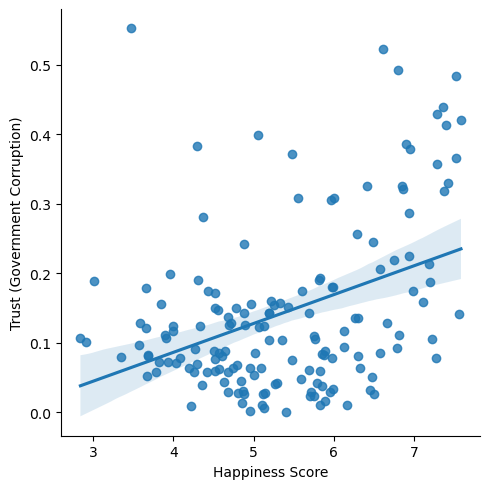

In [280]:
sns.lmplot(x='Happiness Score', y='Trust (Government Corruption)', data=df1_copy,)

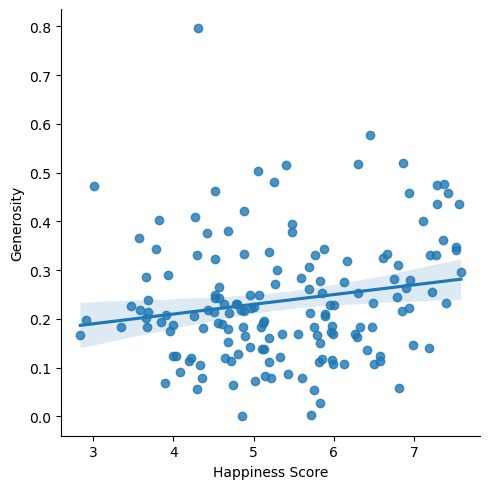

In [282]:
sns.lmplot(x='Happiness Score', y='Generosity', data=df1_copy)

# Correlation Matrix

In [283]:
correlation_matrix=df1_copy.corr()

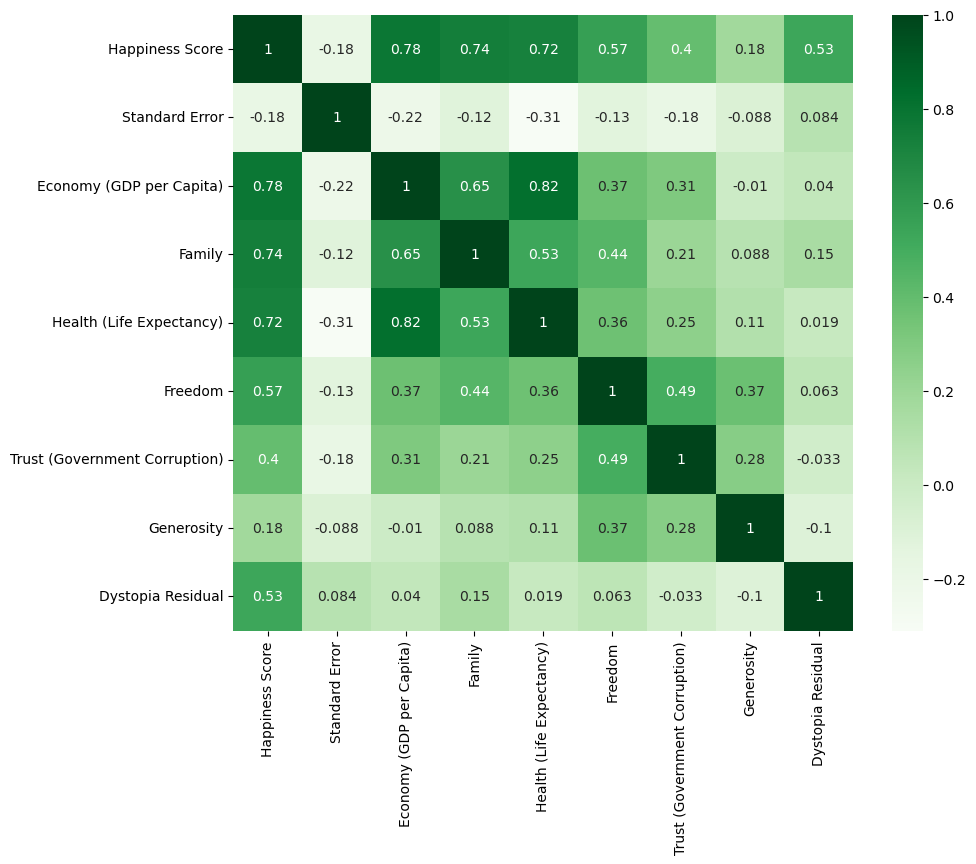

In [284]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='Greens', annot=True)
plt.show()

In [ ]:
#create list
list_6=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']

In [335]:
#create data frame
list_6df=pd.DataFrame(list_6, columns=['Features'])
list_6df

,Features
0,Economy (GDP per Capita)
1,Family
2,Health (Life Expectancy)
3,Freedom
4,Trust (Government Corruption)
5,Generosity


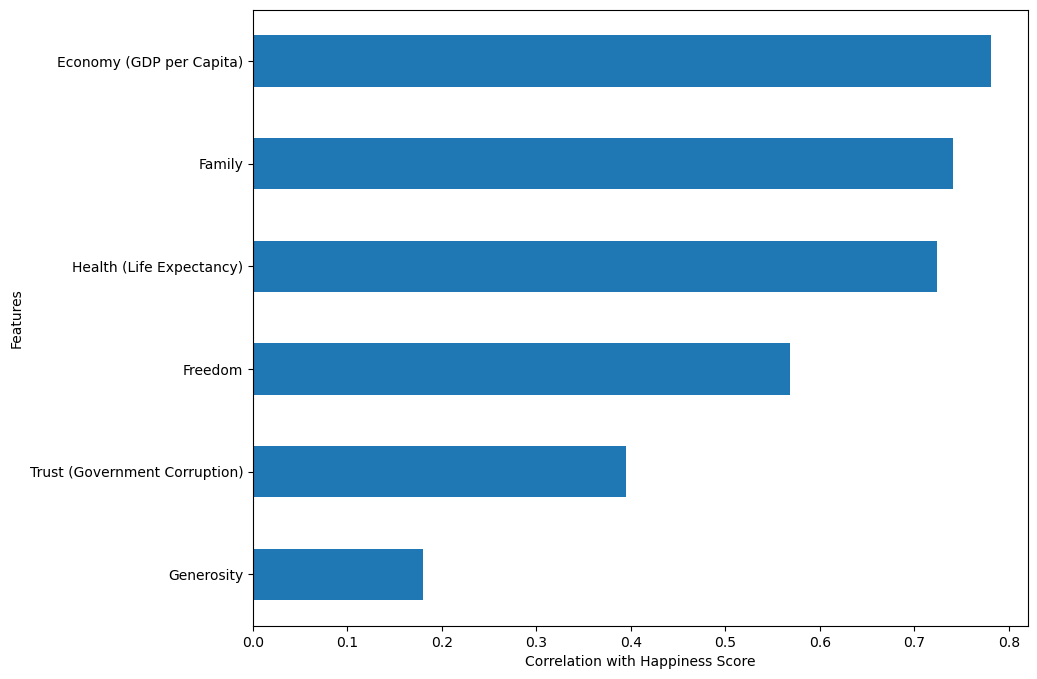

In [334]:
    
#calculate new correlation
correlation_matrix=df1_copy[['Happiness Score']+list_6].corr()

new_corr=correlation_matrix['Happiness Score'].drop('Happiness Score').sort_values()

#plot new correletion matrix 
plt.figure(figsize=(10,8))
new_corr.plot(kind='barh')
plt.xlabel('Correlation with Happiness Score')
plt.ylabel('Features')

plt.show()


In [ ]:
From the above graph we can see the following:
    .Economy, Faily and Health have strong correlation with each other (above 0.7)
    .Freedom and Trust are average in terms of correlation (between 0.3 and 0.6)
    . Generosity has very weak correlation at less than 0.2

<Axes: >

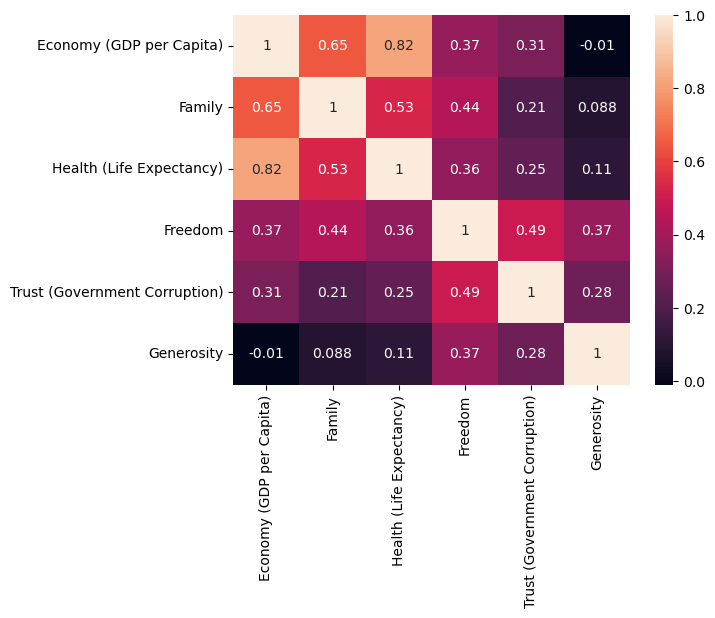

In [336]:
correlation_matrix_6=df1_copy[list_6].corr()
sns.heatmap(correlation_matrix_6, annot=True)

__COMMENT:__ as we can see from the above heatmap:

    'Health' 'Family' and 'Economy' , are the most positively correlated vairables to happiness score.
    
    as a result of this i will create scatter plots in this order to have a closer look at the relationships.
    

# Happiness score against Family

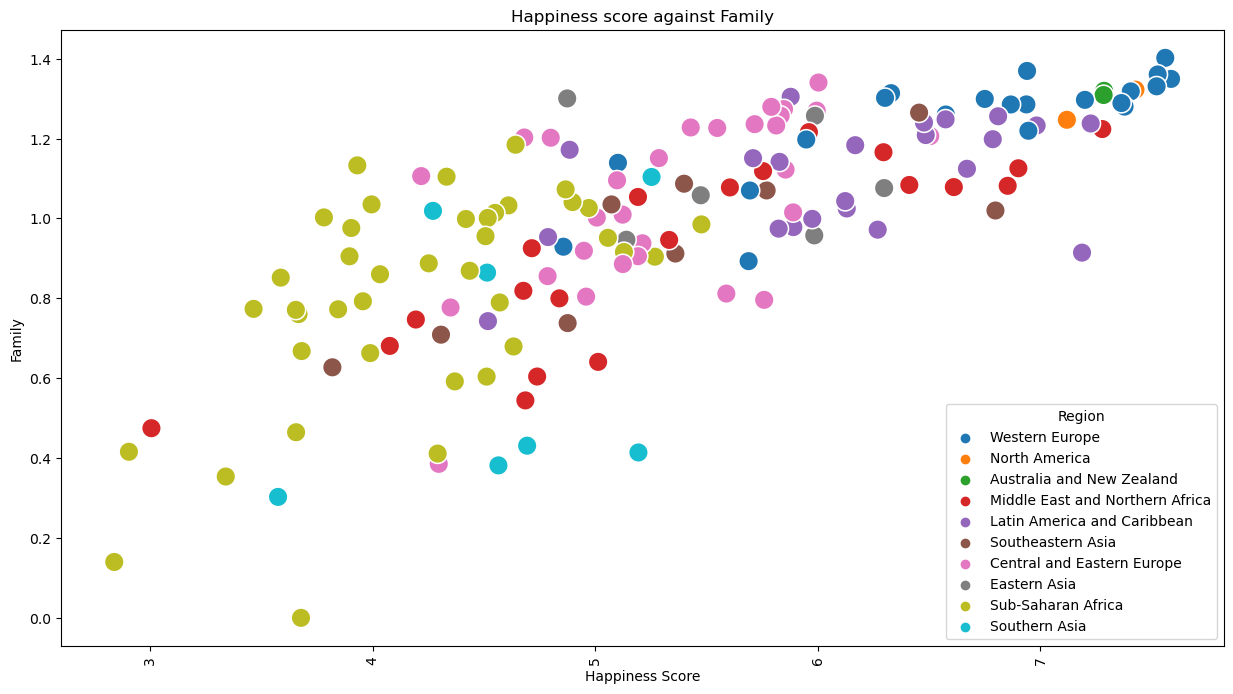

In [347]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Happiness Score', y='Family',hue='Region',data=df1_copy, s=200)
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.title('Happiness score against Family')
plt.xticks(rotation=90)
plt.show()

In [350]:
#
region_fam=df1_copy.groupby('Region')['Family'].sum().sort_values()
region_fam


Region
North America                       2.56972
Australia and New Zealand           2.62890
Southern Asia                       4.51725
Eastern Asia                        6.59656
Southeastern Asia                   8.46421
Middle East and Northern Africa    18.40980
Latin America and Caribbean        24.30385
Western Europe                     26.19334
Central and Eastern Europe         30.53823
Sub-Saharan Africa                 32.36340
Name: Family, dtype: float64

# Happiness score against Health

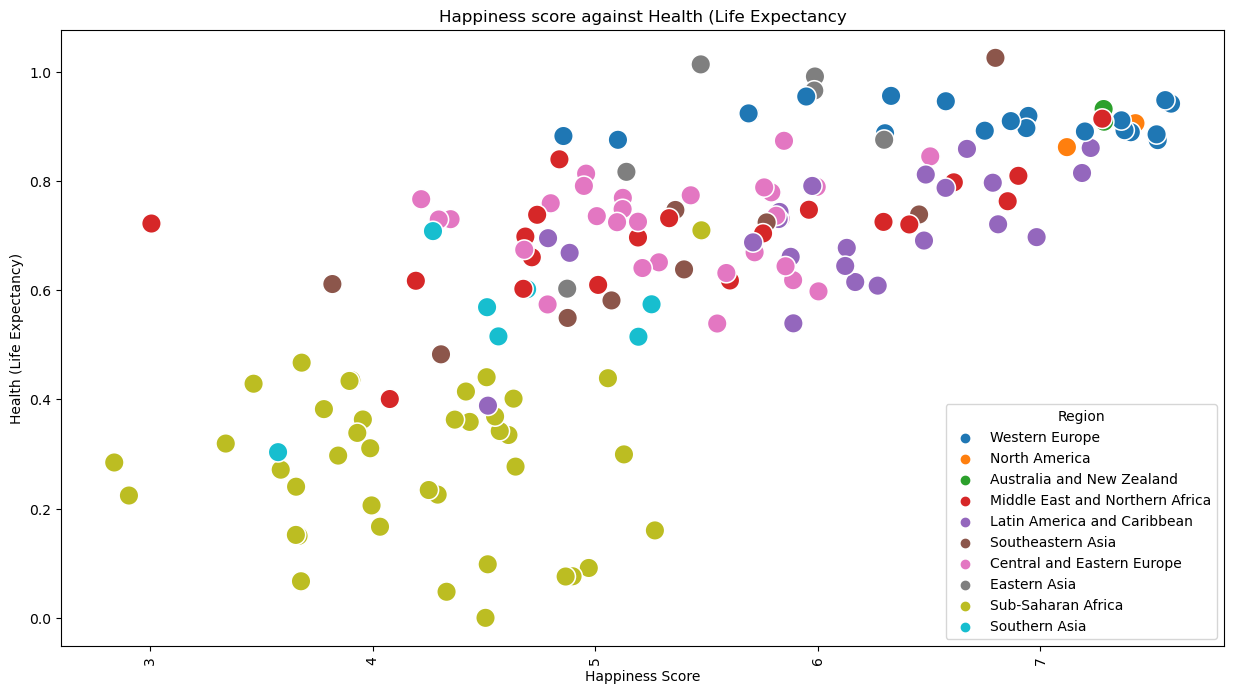

In [348]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Happiness Score', y='Health (Life Expectancy)',hue='Region',data=df1_copy, s=200)
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.title('Happiness score against Health (Life Expectancy')
plt.xticks(rotation=90)
plt.show()

In [352]:
#
region_health=df1_copy.groupby('Region')['Health (Life Expectancy)'].sum().sort_values()
region_health


Region
North America                       1.76742
Australia and New Zealand           1.83993
Southern Asia                       3.78581
Eastern Asia                        5.26433
Southeastern Asia                   6.09621
Sub-Saharan Africa                 11.29327
Middle East and Northern Africa    14.11231
Latin America and Caribbean        15.48515
Western Europe                     19.09211
Central and Eastern Europe         20.84444
Name: Health (Life Expectancy), dtype: float64

# Happiness against Economy

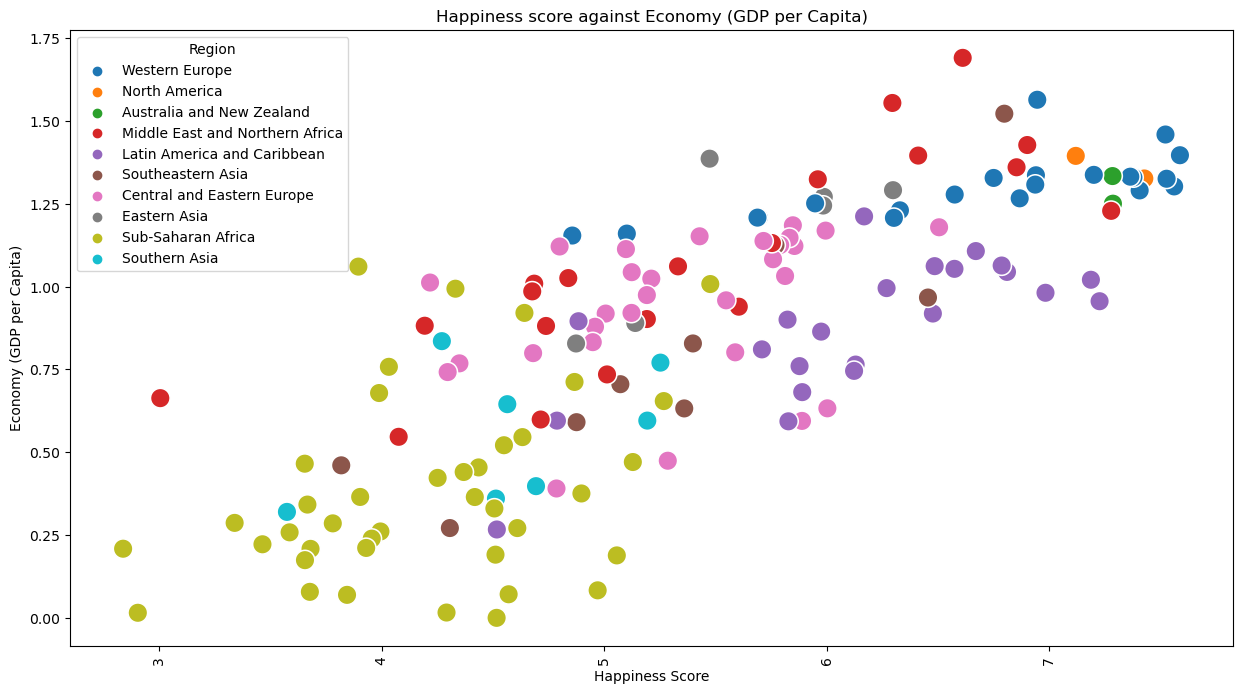

In [286]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Happiness Score', y='Economy (GDP per Capita)',hue='Region',data=df1_copy, s=200)
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.title('Happiness score against Economy (GDP per Capita)')
plt.xticks(rotation=90)
plt.show()


__COMMENT__

this scatter plot is very interesting as it shows each content, generally has similar happiness scores

    . Western Europe has the highest overall happiness scores
    . Western Europe also has the highest GDP per Capita 
    . The Middle-East and Northern Africa has the most varied set of happiness scores
    . Sub-Saharan Africa has the lowest overall happiness scores
    . Sub-Saharan Africa also has the lowest GDP per Capita
    . 
    .some outliers 


Train_test_split

In [428]:
#split data into x and y 
X=df1_copy[list_6]
Y=df1_copy['Happiness Score']

In [429]:
# show X and Y
X
Y

1      7.587
2      7.561
3      7.527
4      7.522
5      7.427
       ...  
154    3.465
155    3.340
156    3.006
157    2.905
158    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [430]:
#define train sampling sizes
tr_sizes=[0.7,0.75, 0.8,0.85]

In [448]:
#make list for results
results=[]

for tr_size in tr_sizes:
    X_train,X_test,Y_train, Y_test=train_test_split(X, Y, train_size=tr_size,random_state=42)
    
    # now train LR model
    model=LinearRegression()
    model.fit(X_train,Y_train)
    
    # make 
    Y_prediction=model.predict(X_test)

    LR_MSE= mean_squared_error(Y_test,Y_prediction)
    print(f'Mean Squared Error (LinReg): {LR_MSE}\n')

    #calculate R^2 score
    LR_R2=r2_score(Y_test,Y_prediction)
    print(f'R^2 score i (LinReg): {LR_R2}\n')
    
    #train RFM 
    RFM_model=RandomForestRegressor(n_estimators=100, random_state=42)

    RFM_model.fit(X_train, Y_train)
    
    Y_RFM_pred=RFM_model.predict(X_test)

    RFM_MSE= mean_squared_error(Y_test,Y_RFM_pred)
    RFM_R2=r2_score(Y_test, Y_RFM_pred)

    print(f' Random Forest MSE: {RFM_MSE}\n')
    print(f' Random Forest R2:{RFM_R2}\n')
    
    #store results

    results.append({
        'train size':tr_size,
        'Mean Squared Error (LinReg)': LR_MSE,
        'R^Score (LinReg)': LR_R2,
        'Mean Squared Error (RFM)': RFM_MSE,
        'R^Score (RFM)': RFM_R2,

    })

#create dataframe of results 
r_df=pd.DataFrame(results)
print(r_df)


Mean Squared Error (LinReg): 0.2656170776585174

R^2 score i (LinReg): 0.8004656793512613

 Random Forest MSE: 0.36173834090625084

 Random Forest R2:0.7282583833027272

Mean Squared Error (LinReg): 0.2298731179759077

R^2 score i (LinReg): 0.8272769985165611

 Random Forest MSE: 0.2736974618100005

 Random Forest R2:0.7943480842019256

Mean Squared Error (LinReg): 0.24193882833563762

R^2 score i (LinReg): 0.8294705100069292

 Random Forest MSE: 0.27010824548125006

 Random Forest R2:0.8096154236105478

Mean Squared Error (LinReg): 0.2540283089204305

R^2 score i (LinReg): 0.8276887568941689

 Random Forest MSE: 0.28915245263333406

 Random Forest R2:0.8038635191011084

   train size  Mean Squared Error (LinReg)  R^Score (LinReg)  \
0        0.70                     0.265617          0.800466   
1        0.75                     0.229873          0.827277   
2        0.80                     0.241939          0.829471   
3        0.85                     0.254028          0.827689   


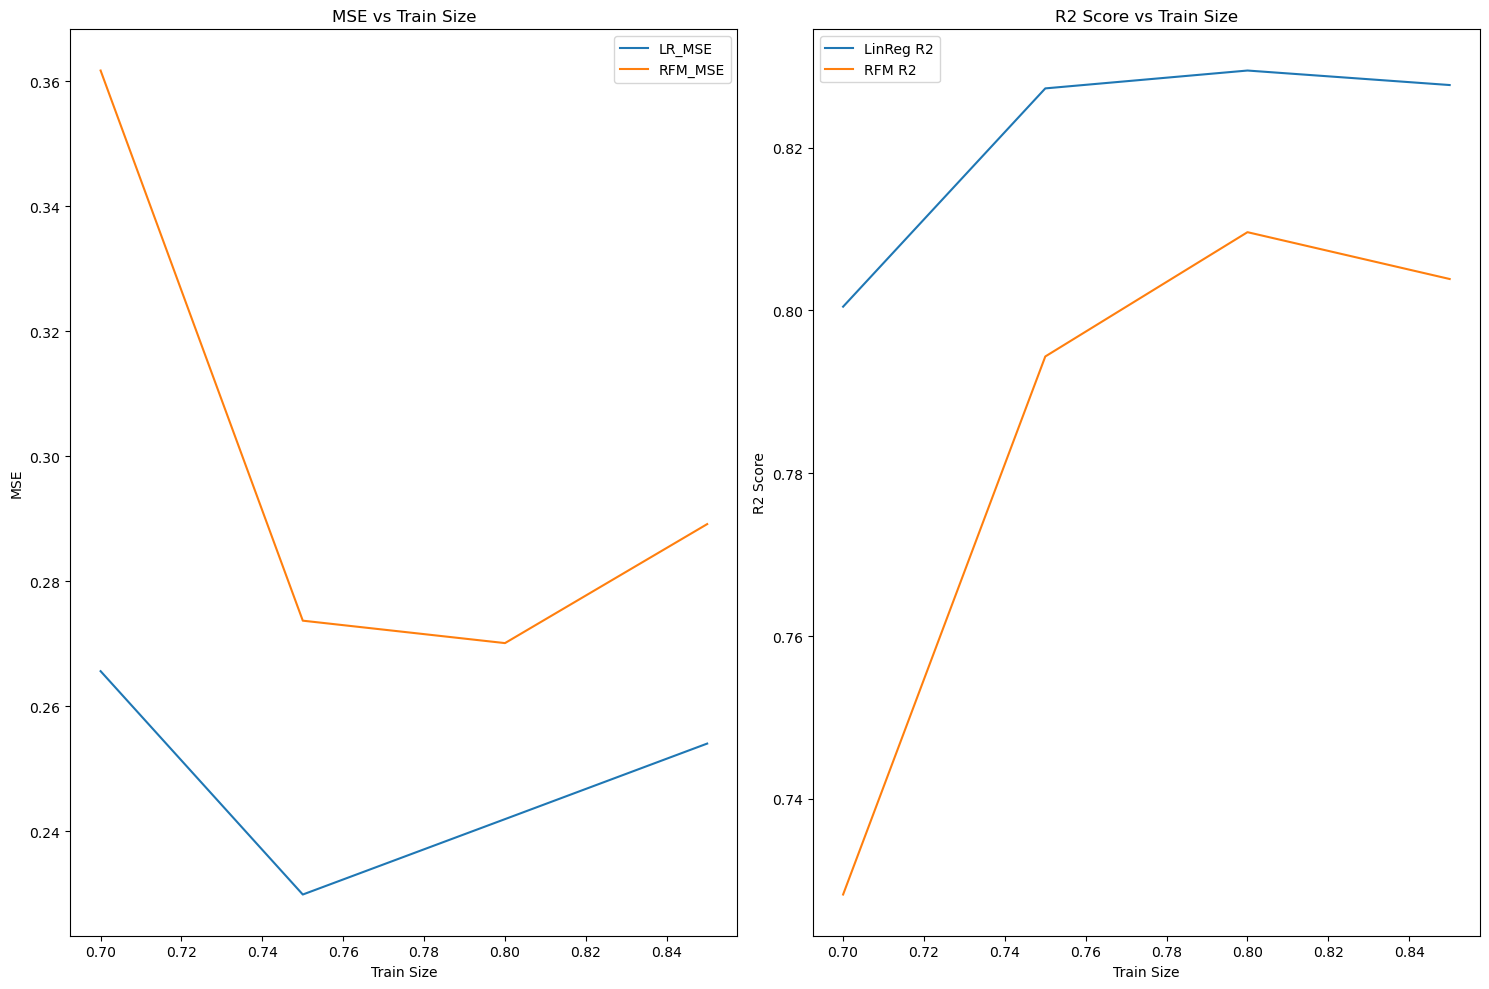

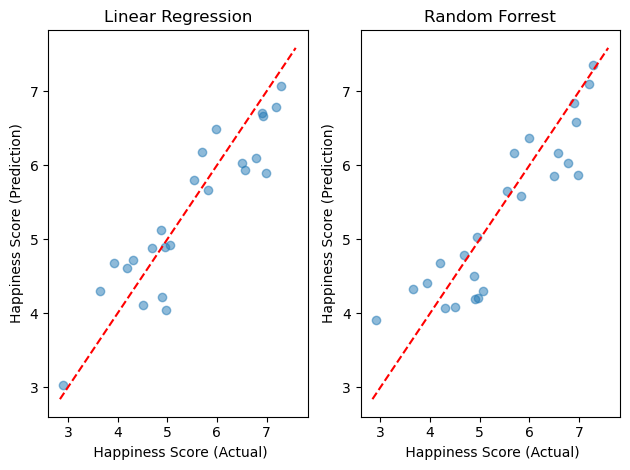

In [459]:
# Linear Regression Predictions
plt.figure(figsize=(15,10))

#plot MSE for LinReg and RF
plt.subplot(1, 2, 1)
plt.plot(r_df['train size'], r_df['Mean Squared Error (LinReg)'], label= 'LR_MSE')
plt.plot(r_df['train size'], r_df['Mean Squared Error (RFM)'], label= 'RFM_MSE')

plt.xlabel('Train Size')
plt.ylabel('MSE')
plt.title('MSE vs Train Size')
plt.legend()

#R2 for LinReg
plt.subplot(1, 2, 2)
plt.plot(r_df['train size'], r_df['R^Score (LinReg)'], label= 'LinReg R2')
plt.plot(r_df['train size'], r_df['R^Score (RFM)'], label= 'RFM R2')

plt.xlabel('Train Size')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Train Size')
plt.legend()

plt.tight_layout()
plt.show()


#scatter plot for RF predictions
plt.subplot(1,2,1)
plt.scatter(Y_test, Y_prediction,alpha=0.5)
plt.plot ([Y.min(), Y.max()],[Y.min(), Y.max()], 'r--')
plt.xlabel(' Happiness Score (Actual)')
plt.ylabel('Happiness Score (Prediction)')
plt.title('Linear Regression')

#LR predictions
plt.subplot(1,2,2)
plt.scatter(Y_test, Y_RFM_pred,alpha=0.5)
plt.plot ([Y.min(), Y.max()],[Y.min(), Y.max()], 'r--')
plt.xlabel(' Happiness Score (Actual)')
plt.ylabel('Happiness Score (Prediction)')
plt.title('Random Forrest')

plt.tight_layout()
plt.show()

linear regression model is slightly more accurate 